# Exploration

- Looking for patterns

In [13]:
# Preliminary setup
import pandas as pd
import numpy as np

import datetime
import calendar

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [14]:
# Import dataset from alldata.pickle
df = pd.read_pickle("alldata_clean.pickle")

In [15]:
# Useful pre-calculations
col_name = df.columns

In [16]:
# Simple stats
df.describe()

# Find time when sub1, sub2 and sub3 are max and min
max_value = {}
min_value = {}
for i in range(0, len(df.columns)-1):
    col = col_name[i]
    max_value[col] = df.iloc[:,i].idxmax()
    min_value[col] = df.iloc[:,i].idxmin()
    
print('Column: Timestamp of Max Value')
max_value

print('Column: Timestamp of Min Value')
min_value

Column: Timestamp of Max Value
Column: Timestamp of Min Value


{'active': Timestamp('2008-08-12 21:26:00+0200', tz='Europe/Paris'),
 'reactive': Timestamp('2006-12-16 18:42:00+0100', tz='Europe/Paris'),
 'volts': Timestamp('2009-05-26 09:14:00+0200', tz='Europe/Paris'),
 'amps': Timestamp('2008-08-05 16:57:00+0200', tz='Europe/Paris'),
 'sub1': Timestamp('2006-12-16 18:24:00+0100', tz='Europe/Paris'),
 'sub2': Timestamp('2006-12-16 18:39:00+0100', tz='Europe/Paris'),
 'sub3': Timestamp('2006-12-16 18:39:00+0100', tz='Europe/Paris')}

Column: Number of Outliers


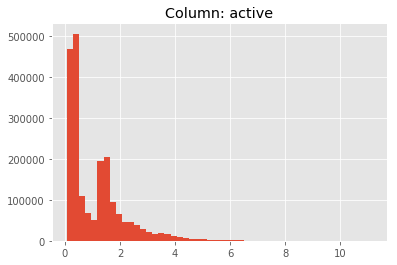

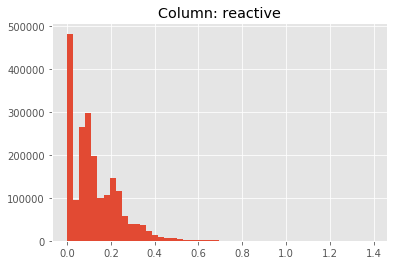

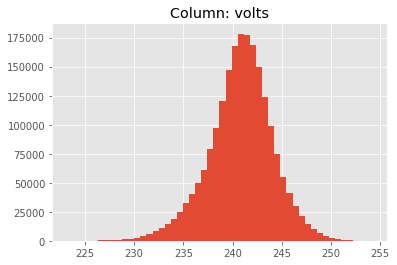

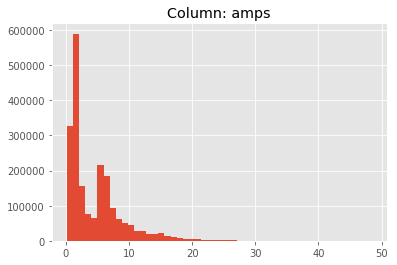

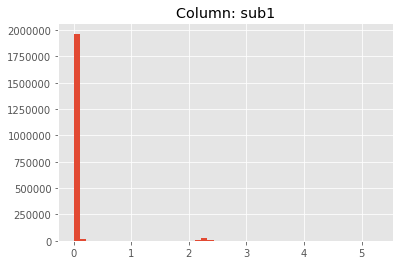

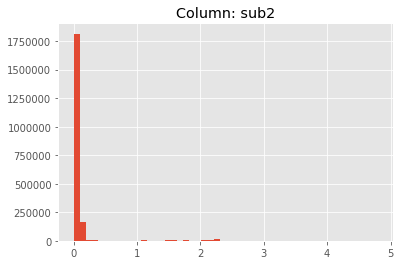

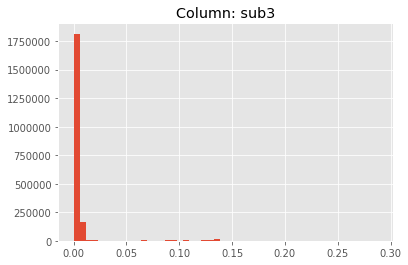

In [17]:
# Look for outliers
# NOTE - there's either tons, or none.. so I think this means there aren't specific outliers to remove from the dataset?
outliers = {}
for i in range(0, len(df.columns)-1):

    # calculate interquartile range
    q25, q75 = df.iloc[:,i].quantile(q=.25), df.iloc[:,i].quantile(q=.75)
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # identify outliers
    o = [x for x in df['active'] if x < lower or x > upper]
    col = col_name[i]
    outliers[col] = len(o)
    
print('Column: Number of Outliers')
outliers
    
# Show histograms of each feature to look for visual outliers
for i in range(0,len(df.columns)-1):
    col = col_name[i]
    title = 'Column: ' + col
    plt.hist(df.iloc[:,i], 50)
    plt.title(title)
    plt.show()

In [18]:
# Choose a random 30-day period, for hourly averaged data
date_time = pd.to_datetime(df.index)
date_array = np.unique(date_time.date)
r = len(date_array)
n = np.random.randint(1,r)
date = date_array[n]
date_end = date_array[n+30]

# dates to strings for convenience in plotting titles
ds = date.strftime('%m/%d/%Y')
de = date_end.strftime('%m/%d/%Y')

# Filter df to only one 30-day period
mask = (pd.to_datetime(df.index).date > date) & (pd.to_datetime(df.index).date <= date_end)
df_month = df.loc[mask]

active
reactive
volts
amps
sub1
sub2
sub3


C:\Users\Toren\Anaconda3\lib\site-packages\matplotlib\pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


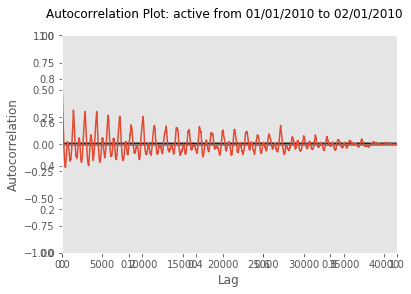

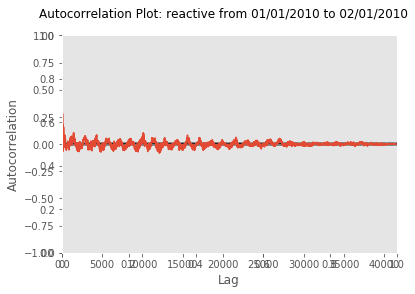

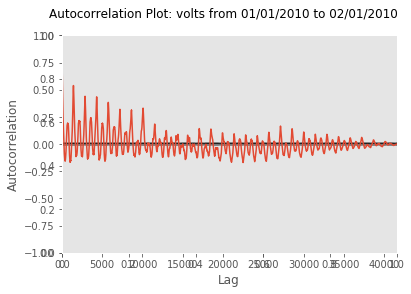

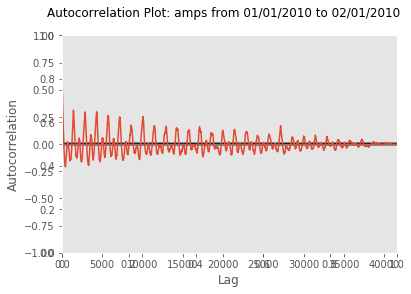

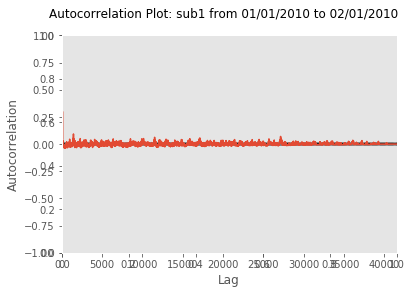

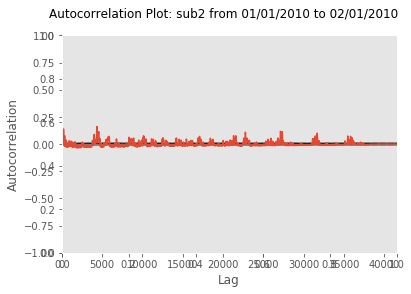

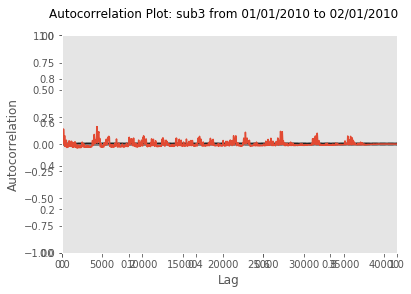

In [19]:
# Autocorrelation

# autocorrelation value for each column
for i in range(0, len(df.columns)-1):
    print(col_name[i])
    colseries = pd.Series(df.iloc[:,i])
    colseries.autocorr()

# autocorrelation plot
for i in range(0, len(df.columns)-1):
    colseries = pd.Series(df_month.iloc[:,i])
    col = col_name[i]
    title = 'Autocorrelation Plot: ' + col + ' from ' + ds + ' to ' + de
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    autocorrelation_plot(colseries)

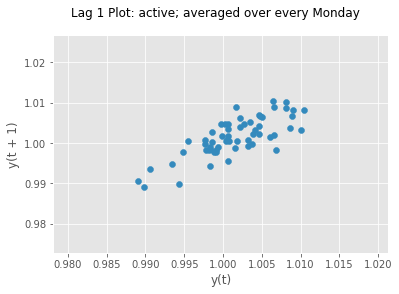

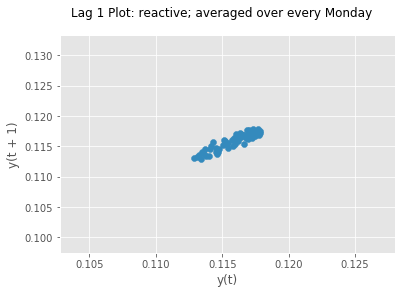

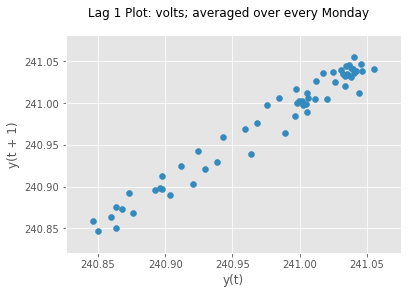

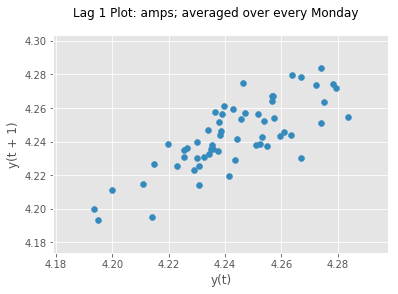

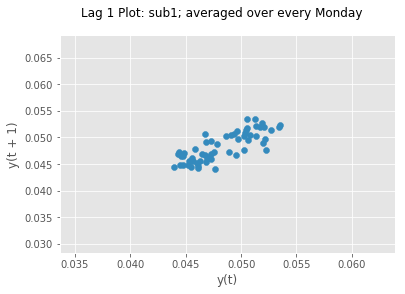

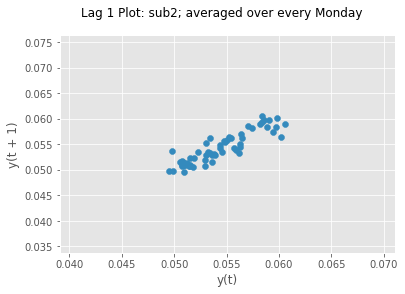

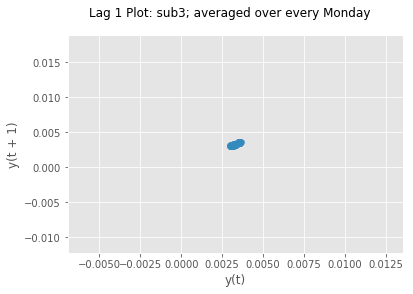

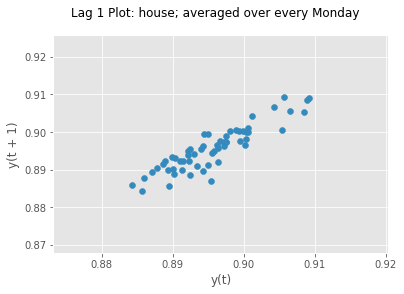

In [20]:
# LAG 1 PLOT SINGLE DAY OF WEEK

# Choose the day(Monday=0 - Sunday=6)
day = 0

# Separate this specific data into its own dataset
oneday = df.groupby(df.index.weekday==day)
o_d = oneday.get_group(True)

avg = o_d.groupby(o_d.index.minute).mean()
avg

# Set plot style
plt.style.use('ggplot')

# Lag plot for each column
for i in range(0, len(df.columns)):
    
    col = col_name[i]
    title = 'Lag 1 Plot: ' + col + '; averaged over every ' + calendar.day_name[day]
    x = avg.iloc[:,i] # set column

    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    lag_plot(x)

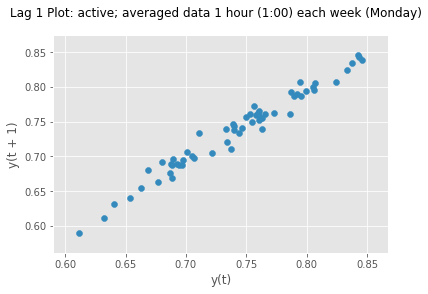

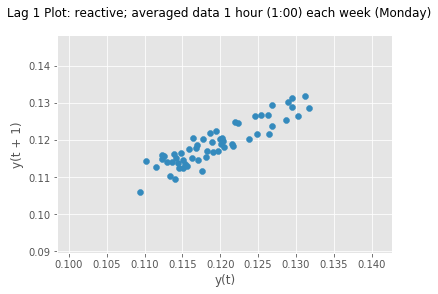

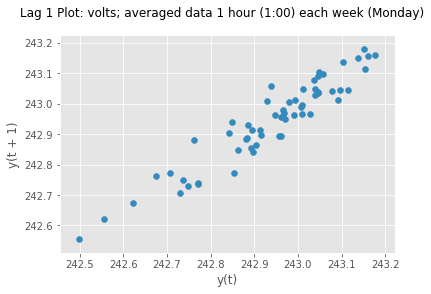

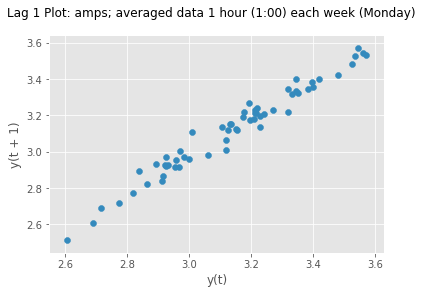

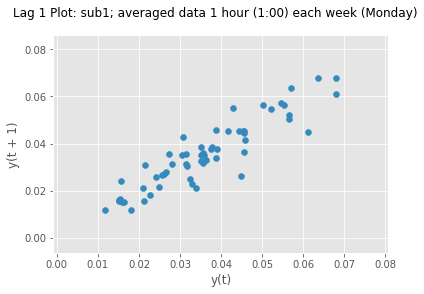

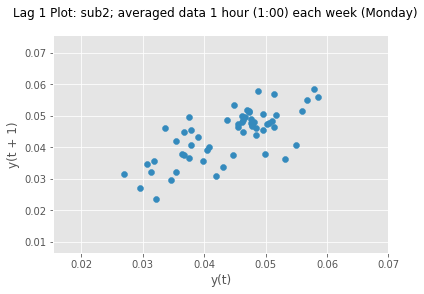

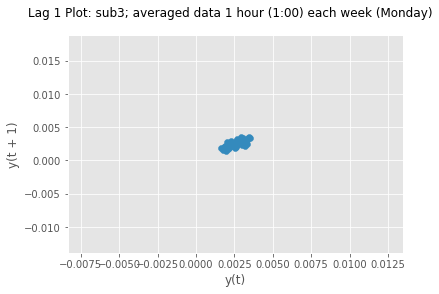

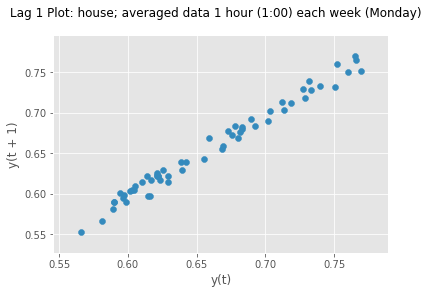

In [21]:
# LAG 1 PLOT 1HOUR EVERY WEEK

# Choose the hour(1 - 24) and day(Monday=0 - Sunday=6)
hour = 1
day = 0

# Separate this specific data into its own dataset
houralldays = df.groupby(df.index.hour==hour)
h_a_d = houralldays.get_group(True)

houreachweek = h_a_d.groupby(h_a_d.index.weekday==day)
h_e_w = houreachweek.get_group(True)

avg = h_e_w.groupby(h_e_w.index.minute).mean()

# Set plot style
plt.style.use('ggplot')

# Lag plot for each column
for i in range(0, len(df.columns)):
    
    col = col_name[i]
    title = 'Lag 1 Plot: ' + col + '; averaged data 1 hour (' + str(hour) + ':00) each week (' + calendar.day_name[day] + ')'
    x = avg.iloc[:,i] # set column

    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    lag_plot(x)

In [22]:
# # Lag Lag Plots
# from mpl_toolkits.mplot3d import Axes3D

# x = df1.iloc[:,0]

# a = pd.DataFrame({'A' : numpy.array([1] * df1.shape[0],dtype='int32'),
#                  'B' : x,
#                  'C' : x.shift(1)})

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(a['A'], a['B'], a['C'])
# #fig.suptitle(title)

active
False     3
True     43
Name: active, dtype: int64
reactive
False    10
True     36
Name: reactive, dtype: int64
volts
False    25
True     21
Name: volts, dtype: int64
amps
False     3
True     43
Name: amps, dtype: int64
sub1
True    46
Name: sub1, dtype: int64
sub2
True    46
Name: sub2, dtype: int64
sub3
True    46
Name: sub3, dtype: int64


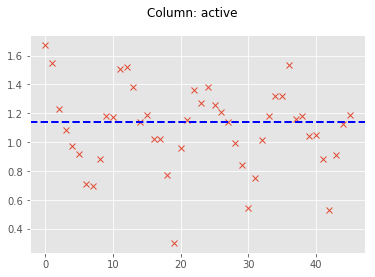

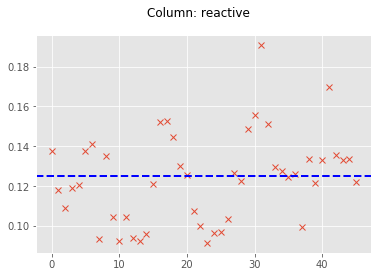

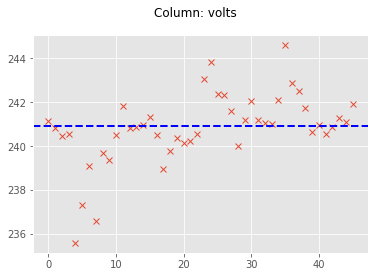

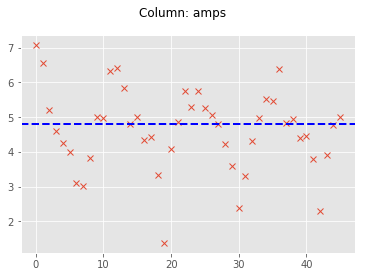

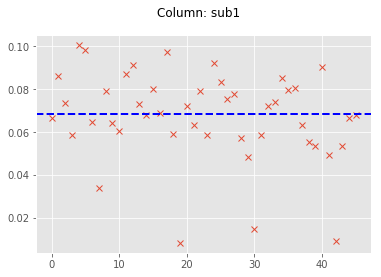

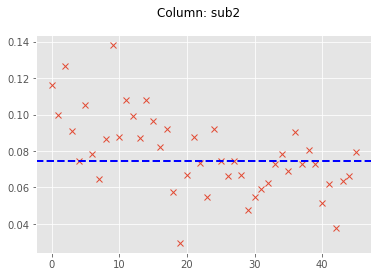

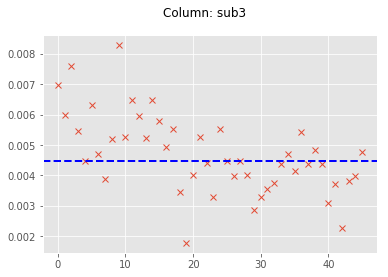

In [23]:
# Check for Stationarity/Nonstationarity using The Runs Test

# Split the data into time intervals of equal lengths (1 month)
date_time = pd.to_datetime(df.index)
date_array = np.unique(date_time.date)
year_array = date_time.year
month_array = date_time.month

s = 2
e = 32
groups = (year_array[len(year_array)-1] - year_array[1]) * 12 + (month_array[len(month_array)-1] - month_array[1])
tmp = {}

for i in range(1,groups):
    start = date_array[s]
    end = date_array[e]
    mask = (pd.to_datetime(df.index).date >= start) & (pd.to_datetime(df.index).date < end)
    tmp[i] = df.loc[mask]
    s = e+1
    e = s+30
    
# Median of dataset
df_median = df.median()

# Calculate mean for each interval (rows are intervals)
mn = pd.DataFrame(np.random.randn(groups-1,8), columns=['active', 'reactive', 'volts', 'amps', 'sub1', 'sub2', 'sub3', 'house'])
for i in range(1,groups):
    idx = i-1
    mn.iloc[idx,:] = tmp[i].mean()
    
# Count number of means above and below median
for i in range(0, len(df.columns)-1):
    ts = mn.iloc[:,i]
    ts_median = df_median[i]
    
    count = ts.groupby(ts > ts_median).count()
    print(count)

# Plot the means of each interval along with the median of each series of means
for i in range(0, len(df.columns)-1):
    col = col_name[i]
    title = 'Column: ' + col
    ts = mn.iloc[:,i]
    ts_median = ts.median()
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    ax.plot(ts, marker='x', linewidth=0)
    ax.axhline(y=ts_median, xmin=0, xmax=50, color='b', linestyle='--', lw=2)